In [1]:
pip install geopandas matplotlib descartes contextily turfpy scipy

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.4/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import geopandas as gpd
import geojson
import os,sys,inspect
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
from turfpy.measurement import centroid
from geojson import Polygon

In [7]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))

In [8]:
# Get Berlin shape data
url = gpd.datasets.get_path('naturalearth_lowres')
url = 'https://raw.githubusercontent.com/funkeinteraktiv/Berlin-Geodaten/master/berlin_bezirke.geojson'
world = gpd.read_file(url)
crs_projection = "EPSG:4326"

# world = world[world.name == 'Mitte']

In [9]:
# Define locations
filename = "locations.geojson"
file = open(filename)
points_gdf = gpd.read_file(file)
with open(filename) as f:
    gj = geojson.load(f)
    

In [10]:
# Get Centroid
center = centroid(gj)

gs = gpd.GeoSeries([Point(center.geometry.coordinates[0], center.geometry.coordinates[1])])

center_gdf = gpd.GeoDataFrame(
    geometry=gs, 
    crs=crs_projection
)

center_gdf

,geometry
0,POINT (13.17668 51.96348)


In [22]:
# Get Median

# https://gist.github.com/caffeine-potent/e885a11333be566f33f9a5d2a0c1f2e8
from scipy.spatial.distance import euclidean

points = list(map(lambda x: x.geometry.coordinates, gj.features))

print(points)

distance = euclidean

# sums the map of dinstances from p1 to p2 of the points array
# creates a touple of p1 and created summed dinstances from prev map
# gets the minimum value of the created map at last
geometric_mediod = min(
    map(
        lambda p1: (p1, sum(map(lambda p2: distance(p1, p2), points))), points
    ),
    key = lambda x:x[1]
)[0]

median_gdf = center_gdf = gpd.GeoDataFrame(
    geometry=[Point(geometric_mediod)], 
    crs=crs_projection
)

median_gdf

[[13.43439, 52.465708], [13.463301, 52.549], [13.32589, 52.508787], [13.412333, 52.541441], [13.296965, 52.502698], [13.431562, 52.513224], [13.43991, 52.488225], [11.609059, 48.138758]]


,geometry
0,POINT (13.43156 52.51322)


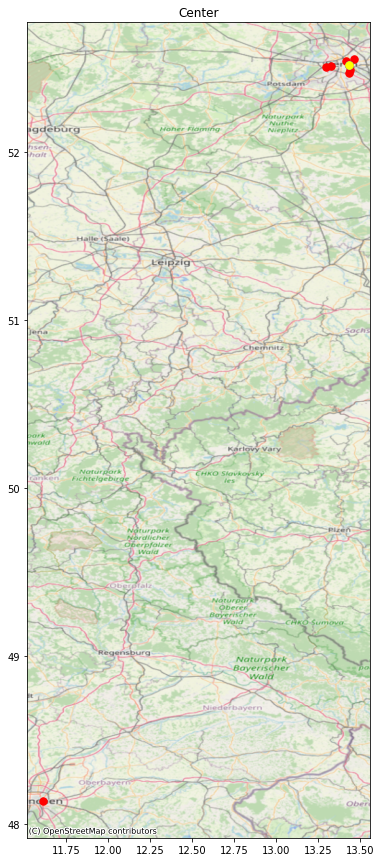

In [21]:
# Prepare Plot area
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()
ax.set_title("Center")

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# Plot data
# world.to_crs("EPSG:4326").plot(ax=ax, alpha=0.2, color='blue', edgecolor='black')
points_gdf.to_crs(crs_projection).plot(ax=ax, marker='o', color='red', markersize=55)
center_gdf.to_crs(crs_projection).plot(ax=ax, marker='o', color='blue', markersize=60)
median_gdf.to_crs(crs_projection).plot(ax=ax, marker='o', color='yellow', markersize=60)


ctx.add_basemap(ax, zoom=8, crs=crs_projection, source=ctx.providers.OpenStreetMap.Mapnik)